In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [177]:

data=pd.read_csv("C:\Mydata\ML Course\machine-learning-ex\ex2\ex2data1.txt",header=None)
data.columns=['x1','x2','y']


In [178]:
data

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [179]:
X=data.iloc[:,0:2]

y=data.iloc[:,2]
pos=[]
neg=[]
for i in range(len(y)):
     if y[i]==1:
       pos.append(i)
     else:
      neg.append(i)

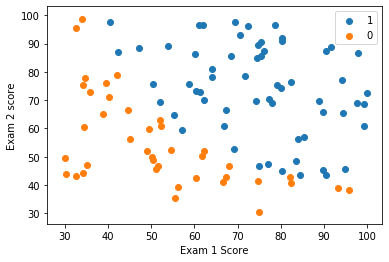

In [122]:
plt.scatter(X.iloc[pos,0],X.iloc[pos,1],label='1')
plt.scatter(X.iloc[neg,0],X.iloc[neg,1],label='0')
plt.legend(loc='upper right')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 score')
plt.show()

In [123]:
[m,n]=X.shape

a=np.ones((m,1))
b=pd.DataFrame(a)
X=pd.concat([b,X],axis=1,sort=False)
X=np.matrix(X)
X.columns=['x0','x1','x2']
y=np.matrix(y)



initial_theta=np.zeros((n+1,1))
print(initial_theta)

[[0.]
 [0.]
 [0.]]


In [124]:

def sigmoid(z):
  a=np.exp(-z)
  b=1+a
  c=1/b
  return c

In [136]:

def costfunction(theta,X,y):
 m=y.size

 J=0
 grad=np.zeros((len(theta)))
 z=np.matmul(X,initial_theta)
 h=sigmoid(z)
 t=(np.matmul(-y,np.log(h)))-(np.matmul((1-y),np.log(1-h)))
 J=(1/m)*t
 y1=y.transpose()
 a=(h-y1)
 b=a.transpose()
 grad=(1/m)*(np.matmul(b,X))
 
 return J,grad

In [137]:
print(costfunction(initial_theta,X,y))

(matrix([[0.69314718]]), matrix([[ -0.1       , -12.00921659, -11.26284221]]))


In [144]:
#Now we will implement a logistic regression using scikit learn
#Importing data and seprating into X (independent variable) and y(dependent variable)

data=pd.read_csv("C:\Mydata\ML Course\machine-learning-ex\ex2\ex2data1.txt",header=None)
data.columns=['x1','x2','y']
X1=data.iloc[:,0:2]

y1=data.iloc[:,2]

In [160]:
x_train,x_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3,random_state=42)
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [161]:
y_pred=logreg.predict(x_test)

In [162]:
score=logreg.score(x_test,y_test)
score

0.8333333333333334

In [163]:
confusion_metrics=metrics.confusion_matrix(y_test,y_pred)
confusion_metrics

array([[ 8,  1],
       [ 4, 17]], dtype=int64)

In [164]:
metrics.accuracy_score(y_test,y_pred)

0.8333333333333334

In [168]:
logreg.coef_

array([[0.24058926, 0.20741881]])

In [170]:
logreg.intercept_

array([-28.2763317])

In [172]:
x_pt=np.linspace(0,100,1000)
y_pt=((-0.24058926/0.2074881)*x_pt)-((-28.2763317/0.20))

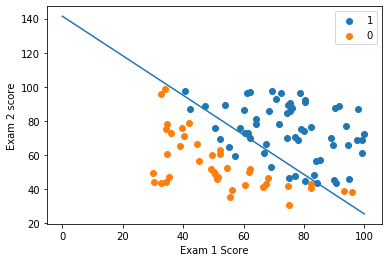

In [180]:
plt.plot(x_pt,y_pt)
plt.scatter(X.iloc[pos,0],X.iloc[pos,1],label='1')
plt.scatter(X.iloc[neg,0],X.iloc[neg,1],label='0')
plt.legend(loc='upper right')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 score')
plt.show()